In [3]:
import scipy
import numpy as np
import matplotlib.pyplot as plt
import cmath

M_0 = 1#initial magnetisation
T = 100#relaxationtime
y = 0.5 #gamma rad/Ts
B_0 = 1 #applied field T
w_list= np.linspace(0,1,100)#frequency sweep values
B_1 = 10**-1#rf field strength


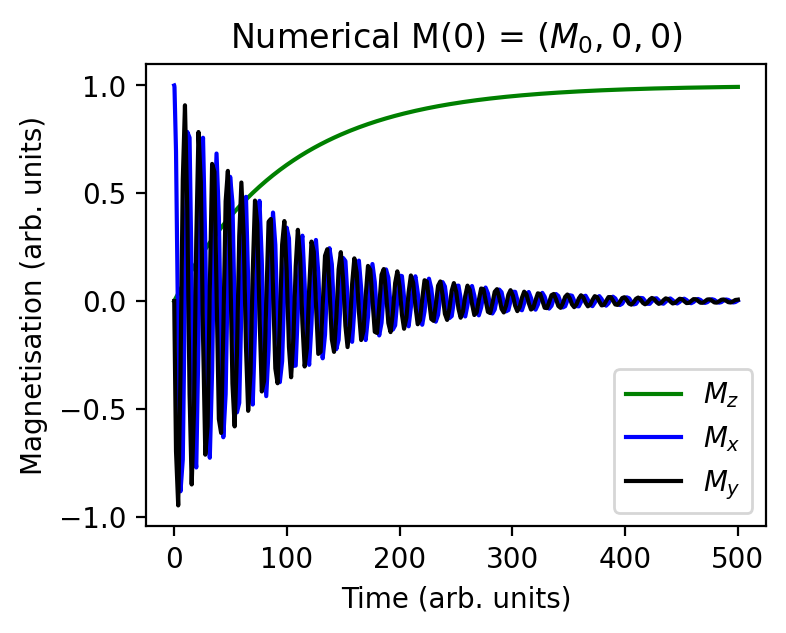

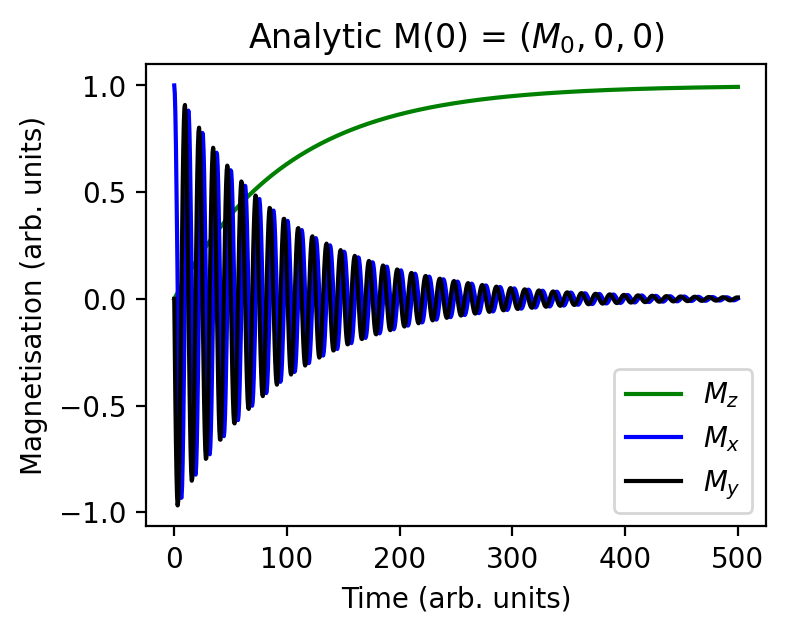

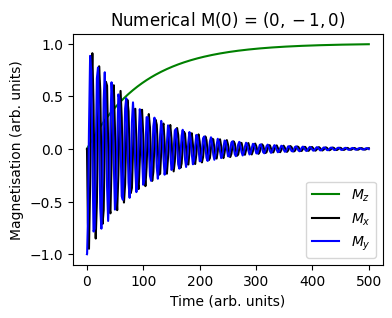

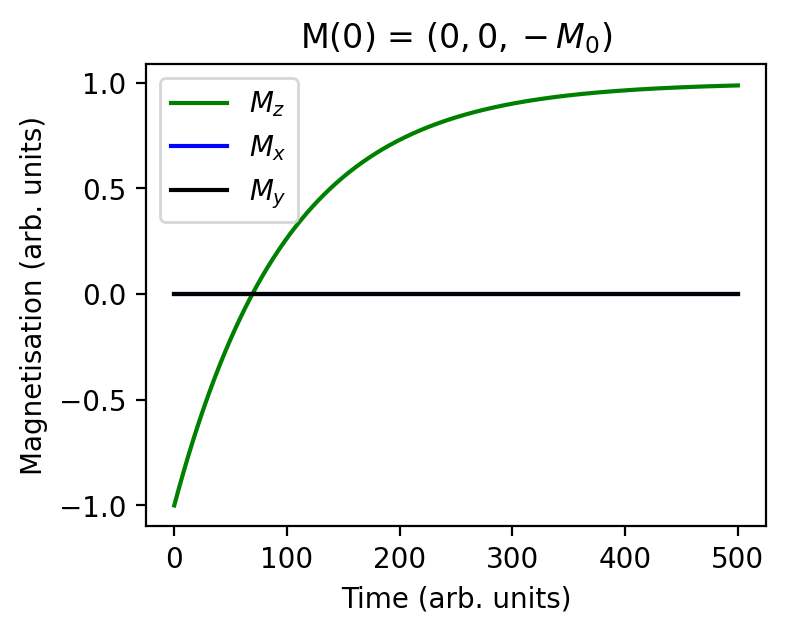

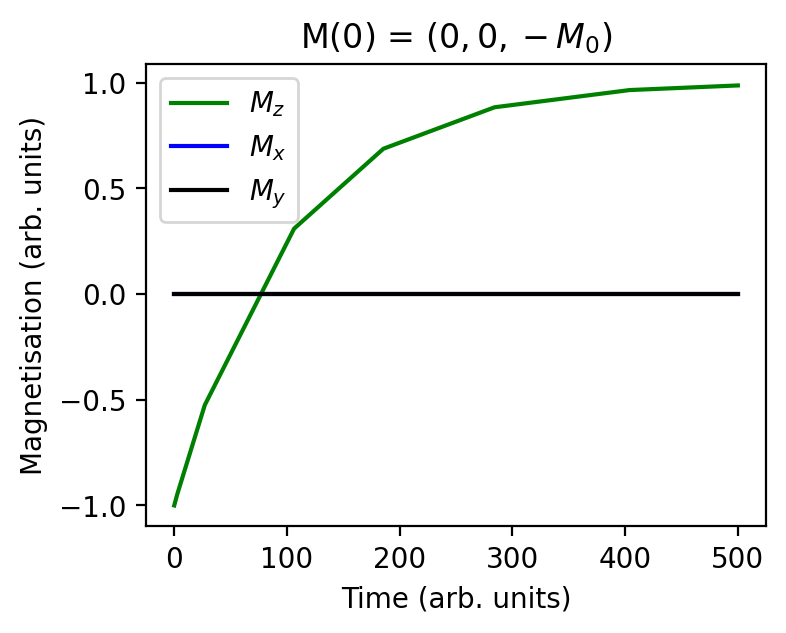

In [6]:
t= np.linspace(0,500, 1000)

#######################################
# (a) Still axes, B = (0,0,B_0), M(t=0) = (M_0, 0,0)

def dMdt_still_z(t,M):
  return(-M[0]/T + M[1]*B_0*y, -M[0]*B_0*y -M[1]/T, -M[2]/T+M_0/T)
sol = scipy.integrate.solve_ivp(dMdt_still_z, [0,500], [1,0,0])
plt.figure(figsize=(4,3), dpi = 200)
plt.plot(sol.t, sol.y[2], "g", label = "$M_{z}$")
plt.plot(sol.t, sol.y[0], "b",label = "$M_{x}$")
plt.plot(sol.t, sol.y[1], "k", label = "$M_{y}$")
plt.title("Numerical M(0) = $(M_{0}, 0, 0)$")
plt.xlabel("Time (arb. units)")
plt.ylabel("Magnetisation (arb. units)")
plt.legend()



#below plots analytic solutions to above to check agreement
Mz = M_0 *(1-np.exp(-t/T))
Mx = M_0 * np.exp(-t/T)*np.cos(y*B_0*t)
My = -M_0 * np.exp(-t/T)*np.sin(y*B_0*t)
plt.figure(figsize=(4,3), dpi = 200)
plt.plot(t, Mz, "g",label = "$M_{z}$")
plt.plot(t, Mx, "b", label = "$M_{x}$")
plt.plot(t, My, "k", label = "$M_{y}$")
plt.title("Analytic M(0) = $(M_{0}, 0, 0)$")
plt.xlabel("Time (arb. units)")
plt.ylabel("Magnetisation (arb. units)")
plt.legend()


sol = scipy.integrate.solve_ivp(dMdt_still_z, [0,500], [0,-1,0])
plt.figure(figsize=(4,3), dpi = 100)
plt.plot(sol.t, sol.y[2], "g", label = "$M_{z}$")
plt.plot(sol.t, sol.y[0], "k", label = "$M_{x}$")
plt.plot(sol.t, sol.y[1], "b", label = "$M_{y}$")
plt.title("Numerical M(0) = $(0, -1, 0)$")
plt.xlabel("Time (arb. units)")
plt.ylabel("Magnetisation (arb. units)")
plt.legend()
###################
# (b) Still axes, B = (0,0,B_0), M(t=0) = (0, 0,-M_0)
Mz = M_0 *(1-2*np.exp(-t/T))
Mx = 0*-M_0 * np.exp(-t/T)*np.sin(y*B_0*t)
My = 0*M_0 * np.exp(-t/T)*np.sin(y*B_0*t)
plt.figure(figsize=(4,3), dpi = 200)
plt.plot(t, Mz, "g", label = "$M_{z}$")
plt.plot(t, Mx, "b", label = "$M_{x}$")
plt.plot(t, My, "k", label = "$M_{y}$")
plt.title("M(0) = $(0, 0, -M_{0})$")
plt.xlabel("Time (arb. units)")
plt.ylabel("Magnetisation (arb. units)")
plt.legend()

#below plots analytic solutions to above to check agreement
sol = scipy.integrate.solve_ivp(dMdt_still_z, [0,500], [0,0,-M_0])
plt.figure(figsize=(4,3), dpi = 200)
plt.plot(sol.t, sol.y[2], "g", label = "$M_{z}$")
plt.plot(sol.t, sol.y[0], "b", label = "$M_{x}$")
plt.plot(sol.t, sol.y[1], "k", label = "$M_{y}$")
plt.title("M(0) = $(0, 0, -M_{0})$")
plt.xlabel("Time (arb. units)")
plt.ylabel("Magnetisation (arb. units)")
plt.legend()




<function dMdt_still at 0x7a792de985e0>


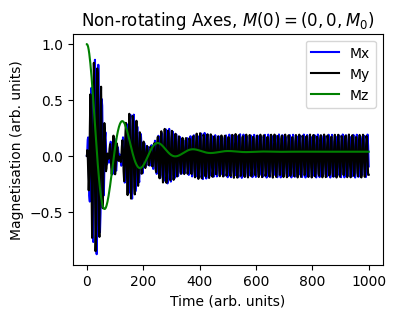

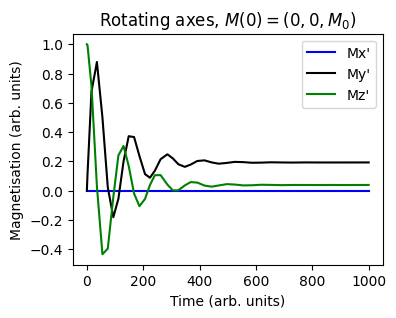

In [7]:




M_0 = 1
w= 0.5

def dMdt_rot1(t, M):
  return(-M[0]/T +(B_0*y - w)*M[1],
         (-B_0*y + w)*M[0] - M[1]/T +y*B_1*M[2],
         -B_1*y*M[1] - M[2]/T + M_0/T)#from harris book


def dMdt_still(t, M):
  return(y*B_1*np.sin(w*t)*M[2] + y*B_0*M[1] - M[0]/T,
         y*B_1*np.cos(w*t)*M[2] - y*B_0*M[0] - M[1]/T,
         -y*B_1*np.cos(w*t)*M[1] -y*M[0]*B_1*np.sin(w*t) -M[2]/T +M_0/T)#from me
print(dMdt_still)


plt.figure(figsize=(4,3), dpi = 100)
sol = scipy.integrate.solve_ivp(dMdt_still, [0,1000], [0,0,1])
plt.plot(sol.t, sol.y[0], "b",  label = "Mx")
plt.plot(sol.t, sol.y[1], "k", label = "My")
plt.plot(sol.t, sol.y[2], "g", label = "Mz")
plt.title("Non-rotating Axes, $M(0) = (0,0,M_0)$")
plt.legend()
plt.xlabel('Time (arb. units)')
plt.ylabel("Magnetisation (arb. units)")
plt.show()

plt.figure(figsize=(4,3), dpi = 100)
sol = scipy.integrate.solve_ivp(dMdt_rot1, [0,1000], [0,0,1])
plt.plot(sol.t, sol.y[0], "b",  label = "Mx'")
plt.plot(sol.t, sol.y[1], "k", label = "My'")
plt.plot(sol.t, sol.y[2], "g", label = "Mz'")
plt.title("Rotating axes, $M(0) = (0,0,M_0)$")
plt.legend()
plt.xlabel('Time (arb. units)')
plt.ylabel("Magnetisation (arb. units)")
plt.show()


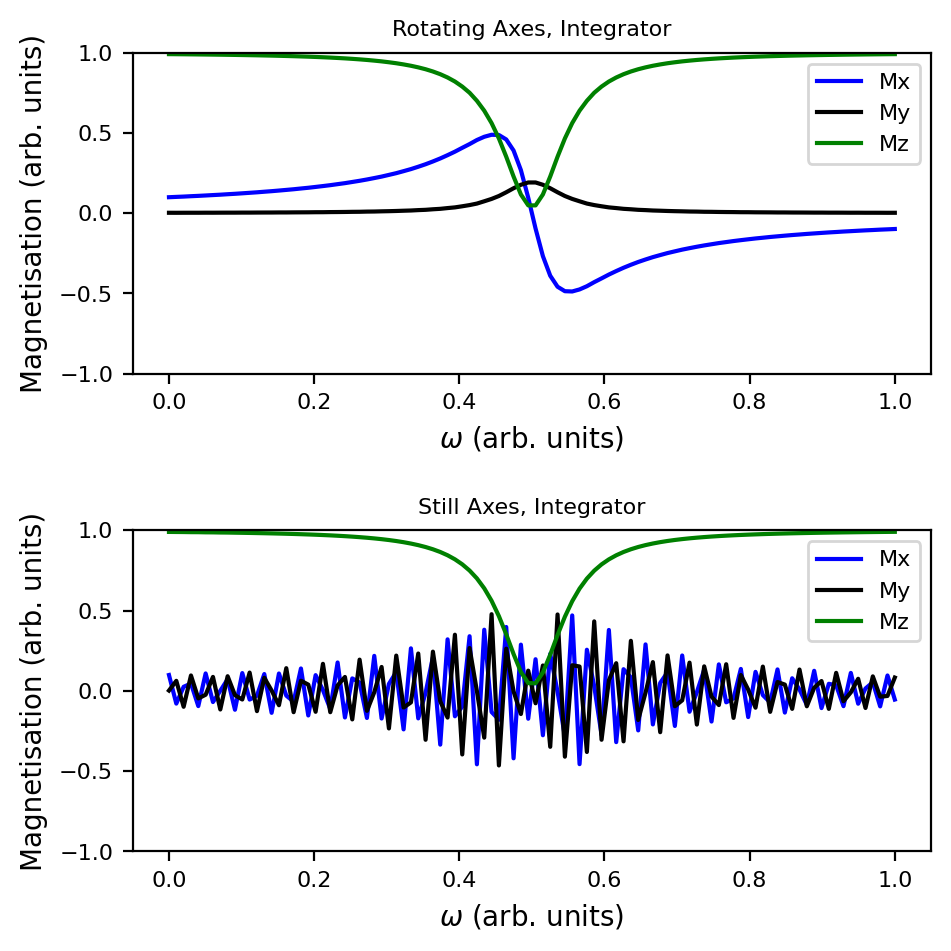

In [ ]:
w_list= np.linspace(0,1,100)
Mxout = np.zeros(len(w_list))
Myout = np.zeros(len(w_list))
Mzout = np.zeros(len(w_list))

for i in range(0, len(w_list)):
  w = w_list[i]
  sol = scipy.integrate.solve_ivp(dMdt_rot1, [0,1000], [0,0,1])
  Mxout[i] = sol.y[0][-1]
  Myout[i] = sol.y[1][-1]
  Mzout[i] = sol.y[2][-1]

plt.figure(figsize=(5,5), dpi = 200)
plt.subplot(211)
plt.plot(w_list,Mxout, "b", label = "Mx")
plt.plot(w_list,Myout,"k", label = "My")
plt.plot(w_list,Mzout, "g",label = "Mz")
plt.xlabel("$\omega$ (arb. units)")
plt.ylabel("Magnetisation (arb. units)")
plt.ylim(-1,1)
plt.legend()
plt.title("Rotating Axes, Integrator")





##############################################################################


# initial condition

for i in range(0, len(w_list)):
  w = w_list[i]
  sol = scipy.integrate.solve_ivp(dMdt_still, [0,1000], [0,0,1])
  Mxout[i] = sol.y[0][-1]
  Myout[i] = sol.y[1][-1]
  Mzout[i] = sol.y[2][-1]

plt.subplot(212)
plt.plot(w_list,Mxout , "b", label = "Mx")
plt.plot(w_list,Myout,"k", label = "My")
plt.plot(w_list,Mzout, "g", label = "Mz")
plt.xlabel("$\omega$ (arb. units)")
plt.ylabel("Magnetisation (arb. units)")
plt.ylim(-1,1)
plt.legend()
plt.title("Still Axes, Integrator")
plt.tight_layout(pad = 2.0)
plt.show()




Text(0.5, 1.0, 'Rotating Axes, Analytic')

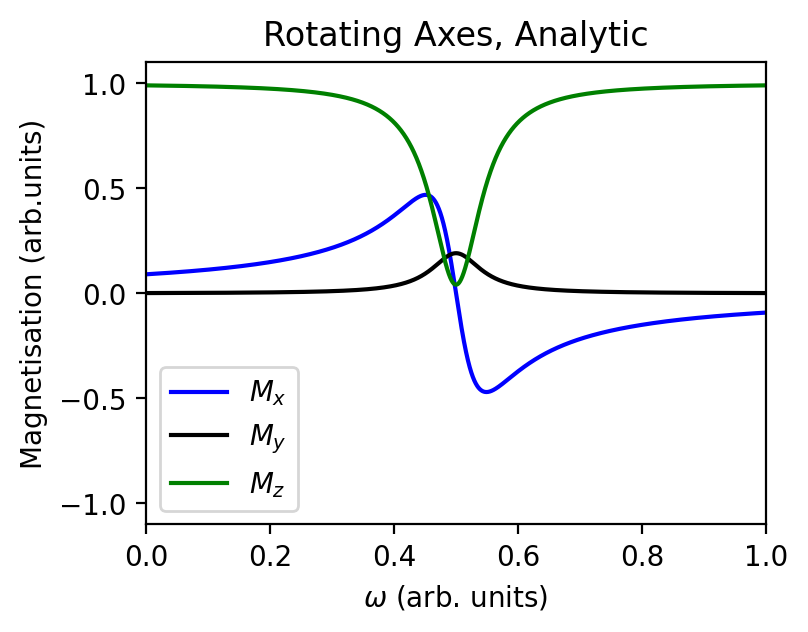

In [5]:
w_list= np.linspace(0,1,100000)
Mxout = np.zeros(len(w_list))
Myout = np.zeros(len(w_list))
Mzout = np.zeros(len(w_list))

for i in range(0, len(w_list)):
  w = w_list[i]
  num = ((((B_0*y-w)**2)/(y*B_1))+((1)/(y*B_1*T**2)))
  denom = ((((B_0*y-w)**2)/(y*B_1))-((1)/(B_1*y*T**2))+y*B_1)
  Mzout[i] = M_0*num/denom
  Myout[i] = (-Mzout[i]+M_0)/(T*y*B_1)
  Mxout[i] = Myout[i]*(B_0*y-w)*T

plt.figure(figsize=(4,3), dpi = 200)
plt.plot(w_list,Mxout,"b", label = "$M_x$")
plt.plot(w_list,Myout, "k",label = "$M_y$")
plt.plot(w_list,Mzout,"g", label = "$M_z$")
plt.xlabel("$\omega$ (arb. units)")
plt.ylabel("Magnetisation (arb.units)")
plt.xlim(0,1)
plt.ylim(-1.1,1.1)
plt.legend()
plt.title("Rotating Axes, Analytic")



